In [1]:
import pandas as pd
from Jvis import TSNE, UMAP
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialization of values
title_fz = 6 # title font
dpi = 200 # dots per inch
metrics = 'euclidean' # how distance is computed in the ambient space of the input data
n_NN = 30 # The default value of n_neighbors for UMAP is 15, we have taken double . Why? large values will push UMAP to look at larger 
# neighborhoods of each point when estimating the manifold structure of the data
min_dist = 0.1 # minimum distance apart that points are allowed to be in the low dimensional representation
# The default value for min_dist (as used above) is 0.1
# what color each cell type will represent in the graph
colors_map = {"NK":'gray', "Naive CD4+ T":'dodgerblue', "FCGR3A+ Mono.":'gold', "CD8+ T":'blue', "CD14+ Mono.":'silver', 
                  "CD4+ T":'red',   "MK":'#cab2d6', "B":'#fb9a99', "Effector CD8+ T":'#fdbf6f', "DC":'lime', "CD34+":'#fdbf6f', "CD16+ Mono.":'#a6cee3'}

In [3]:
rna_df = pd.read_csv('data/pbmc_rna_pca.csv', delimiter=',', header=None) # read csv

In [4]:
adt_df = pd.read_csv('data/pbmc_adt_pca.csv', delimiter=',', header=None) # read csv

In [5]:
tags = dict(enumerate(set(["CD4+ T", "Naive CD4+ T", "FCGR3A+ Mono.", "CD14+ Mono.", "CD4+ T", "CD8+ T", "CD8+ T", "CD4+ T", "B", "MK", "Effector CD8+ T", "NK"] #stable specter
).union(set( ["B", "CD8+ T", "Naive CD4+ T", "FCGR3A+ Mono.", "CD14+ Mono.", "NK", "CD4+ T", "CD4+ T", "CD8+ T", "Effector CD8+ T"] #citefuse
)))) # to check how many total unique cell types are there; there are 12

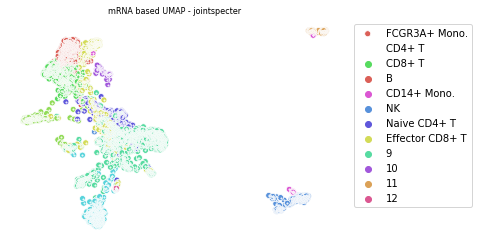

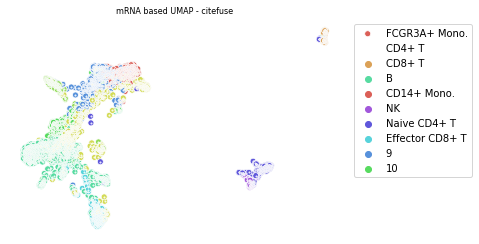

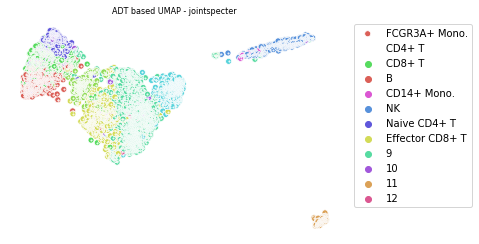

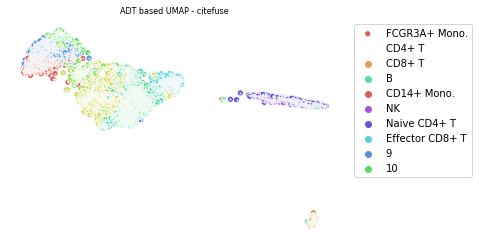

In [8]:
# for loop to loop through both datasets
for name, pca_data in [("mRNA", rna_df), ("ADT", adt_df)]:
    # for loop to loop through jointspecter and citefuse
    for dataset in ["jointspecter", "citefuse"]:
        # dimension reduction via UMAP
        # Weighting applied to negative samples in low dimensional embedding optimization.
        # Values higher than one will result in greater weight being given to negative samples.
        # Repulsion strength was also adjusted because the UMAP was not in the correct rotational alignment, therefore it served as a parameter
        # to rotate the UMAP to get it in the correct way as shown in the paper
        umap = UMAP(n_neighbors=n_NN, min_dist=min_dist, metric=metrics, repulsion_strength=0.1).fit_transform(pca_data)
        # data variable as dataframe of rna_matrix/adt_matrix UMAP
        df = pd.DataFrame(umap, columns=["x", "y"])
        # make label
        df["label"] = pd.read_csv(f'data/pbmc_{dataset}_labels.csv', header=None)
        # labels as integer format
        map(int, df["label"])
        # pallete is corresponded with color hls palette of 12
        palette = dict(zip(df["label"].unique(), sns.hls_palette(12)))
        # ulabels as sorted integers in unique integer list
        ulabels = sorted(df["label"].unique())
        # first sns plot
        sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'label', palette=palette)
        # sns.set(rc={'figure.figsize':(200,200)})
        # for loop for ulabels
        for label in ulabels:
            # plot scatter plot
            sns.scatterplot(data = df[df["label"]==label], x = 'x', y = 'y', s=1.5, color=palette[label])
        # make legend
        plt.legend([tags.get(x,x) for x in ulabels], bbox_to_anchor=(1.02, 1))
        # make title
        plt.title(f"{name} based UMAP - {dataset}", fontdict = {'fontsize' : title_fz+2})
        # make axis
        plt.axis('off')
        # show plot
        plt.show()
    
    